In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pysindy as ps

In [8]:
# Seed the random number generators for reproducibility
np.random.seed(7)

# Initialize integrator keywords for solve_ivp to replicate the odeint defaults
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

# Plot functions
def plot_matrix(matrix, title):
    plt.imshow(matrix, cmap='seismic')
    plt.title(title)
    plt.colorbar()
    plt.axis('off')
    plt.show()

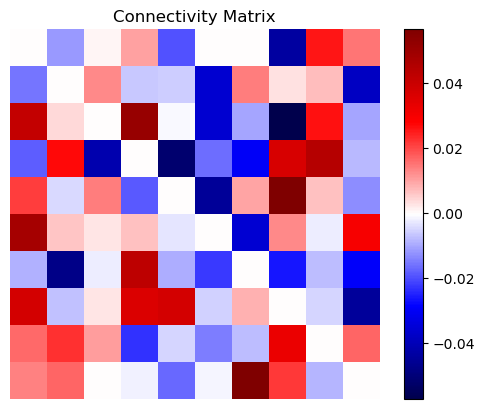

In [9]:
def generate_connectivity_matrix(num_neurons, g):
    # g = gain (scaling factor), g < 1 -> inactive, g > 1 -> spontaneous activity
    # inhibitory connections are negative
    # excitatory connections are positive
    matrix = np.random.normal(0, (g**2) / num_neurons, size=(num_neurons, num_neurons))
    np.fill_diagonal(matrix, 0)
    return matrix

plot_matrix(generate_connectivity_matrix(10, 0.5), 'Connectivity Matrix')

In [10]:
# Differential equation
def f(t, x, J, tau):
    return (1/tau)*(-x + J @ np.tanh(x))

In [ ]:
num_neurons = 5

dt = 0.002

t_train = np.arange(0, 10, dt)
x0_train = np.random.choice([0, 0.5, 1.0], size=(num_neurons,))
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(
    lambda t, x: -x + np.random.randn(num_neurons),
    t_train_span,
    x0_train,
    t_eval=t_train,
    **integrator_keywords).y.T